## Notebook simply for benchmark strategies

In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [8]:
df_test = pd.read_csv("../data/test.csv") # neobsahuje target
df = pd.read_parquet("../data/train_after_eda.parquet")
df = df.drop(columns="base_price")
df.head(3)

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,total_sale
0,1379560,1,55,1885,136.83,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,26955.33
1,1466964,1,55,1993,136.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0,36674.10
2,1346989,1,55,2539,134.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0,25677.54


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   emailer_for_promotion  456548 non-null  int64  
 6   homepage_featured      456548 non-null  int64  
 7   num_orders             456548 non-null  int64  
 8   category               456548 non-null  object 
 9   cuisine                456548 non-null  object 
 10  city_code              456548 non-null  int64  
 11  region_code            456548 non-null  int64  
 12  center_type            456548 non-null  object 
 13  op_area                456548 non-null  float64
 14  total_sale             456548 non-nu

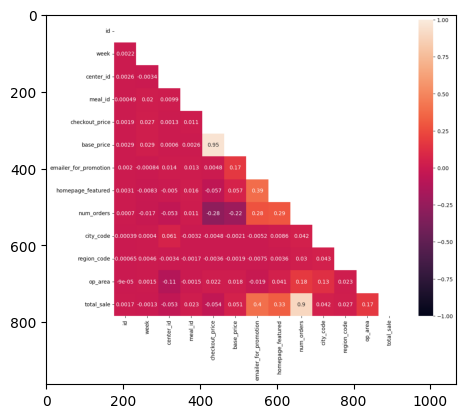

<Figure size 2000x2000 with 0 Axes>

In [10]:
import matplotlib.image as mpimg
image = mpimg.imread("../data/graphs/corr.png")
plot = plt.imshow(image)
plt.figure(figsize=(20, 20))
plt.show(plot)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

PREDICTOR_COLUMS = [col for col in df.columns if col != "num_orders"]
train_df = df[df['week'] <= 120]
test_df = df[df['week'] >= 120]

X_train = train_df[PREDICTOR_COLUMS]
y_train = train_df[["num_orders"]]

X_test = test_df[PREDICTOR_COLUMS]
y_test = test_df[["num_orders"]]

In [12]:
## Preprocessing variables
CATEGORICAL_COLS = ["category", "cuisine", "center_type"]
ct = ColumnTransformer([('_encoder', OneHotEncoder(), CATEGORICAL_COLS)])

In [13]:
pipe = Pipeline([
    ('encoder', ct), 
    ('regression', LinearRegression()), 
])

model = pipe.fit(X_train, y_train)
y_pred = model.predict(X_test)

#SCORE

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(
    f"R2: {r2} \t MAE: {mae} \t MSE: {mse}" 
)

R2: 0.2682307469278159 	 MAE: 162.0727642053469 	 MSE: 97610.9049673144


In [14]:
pipe = Pipeline([
    ('encoder', ct), 
    ('regression', DecisionTreeRegressor(random_state=1)), 
])

model = pipe.fit(X_train, y_train)
y_pred = model.predict(X_test)

#SCORE

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(
    f"R2: {r2} \t MAE: {mae} \t MSE: {mse}" 
)

R2: 0.28846137966327623 	 MAE: 154.68581306988423 	 MSE: 94912.33521861403


## Results
1. Not great results in terms of MSE / R2 but that is just for benchmark which we can improve upon 
2. Big MSE -> maybe outliers? (penalization of big misses)
3. R2 Score -> My predictors do not contribute much -> maybe new ones? maybe heavy outliers?

## Resolution
1. Remove outliers and look if R2 better (does outlier free model explain number of sales better?)
2. If not -> go hunting for better variables